## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [192]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [193]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
print(data.shape)
pd.concat((data.head(), data.tail()))


(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [194]:
data.isnull().sum() # видим одни нули => пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [196]:
#print(set(data.columns)) # видим все признаки
#можно посмотреть на data.describe() и на data.describe(include = 'object')
#Из данного нам описания датасета и  взгляда на выведенные выше строки таблицы, а где есть сомнения - на set(data['column_name'].values)) 
#можно понять, какие значения принимает признак
#вообще говоря, почти всё расписано в описании датасета
#я всё это проделал, напишу финальное разделение:

#amount          количественный, там просто лежит куча чисел
#property        кажется, можно ввести порядок по ценности => будет порядковым
#job              не числа, много вариантов, порядок имхо не вводится (самозанятый хуже или лучше просто работника?) => будет категориальным
#installment_rate     не количественный (не числа), не бинарный (больше двух вариантов), имеет естественный порядок => пусть будет порядковый
#people_liable     принимает всего два значения => пусть будет бинарным
#present_residence   не количественный (не числа), не бинарный (больше двух вариантов), имеет естественный порядок => пусть будет порядковый
#foreign_worker      принимает всего два значения => пусть будет бинарным
#housing              не количественный (не числа), не бинарный (больше двух вариантов), вариант 'for free' имхо мешает ввести порядок => будет категориальным
#age             количественный, там просто лежит куча чисел
#status            не количественный (не числа), не бинарный (больше двух вариантов), непонятно, что лучше - отрицательный баланс или отсутствие счёта => будет категориальным
#credit_history     не количественный (не числа), не бинарный (больше двух вариантов), непонятно, что лучше хорошая кредитная история или её отсутствие -  => будет категориальным 
#telephone         принимает всего два значения => пусть будет бинарным
#savings       не количественный (не числа), не бинарный (больше двух вариантов), имхо имеет порядок (где неизвестность хуже всего) => пусть будет порядковый
#purpose       не числа, много вариантов, порядка нет  => будет категориальным
#employment_duration     не количественный (не числа), не бинарный (больше двух вариантов), имхо имеет порядок (где отсутствие работы хуже всего) => пусть будет порядковый
#other_installment_plans    не числа, 3 варианта, не вижу на нём порядка - будет категориальным
#other_debtors       не числа, 3 варианта, не вижу на нём порядка - будет категориальным
#duration      количественный, очевидно
#personal_status_sex     не числа, вариантов много, порядка не вижу => категориальный
#number_credits      категориальный, но естественно вводится порядок => порядковый
#credit_risk         два значения => бинарный

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [197]:
data.groupby('purpose').amount.mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [198]:
#непонятно, строго моложе или нестрого моложе, то есть ставить знак < или <=. Выведу для обоих
print((data[data.age<30].housing=='rent').mean()*100)         #два ответа на первый вопрос
print((data[data.age<=30].housing=='rent').mean()*100)
######
print((data[data.age>40].housing=='rent').mean()*100)         #два ответа на второй вопрос
print((data[data.age>=40].housing=='rent').mean()*100)

66.66666666666666
68.21515892420538
68.01470588235294
68.56187290969899


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [199]:
# смотрим на set(data.number_credits.values) и видим, что число кредитов >3 - это значения '4-5' и '>= 6'. Поэтому ответ таков:
((data.foreign_worker=='yes') * (data.number_credits.isin(['4-5','>=6']))).sum()


1

### Задание 6 (1 балл)

In [200]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

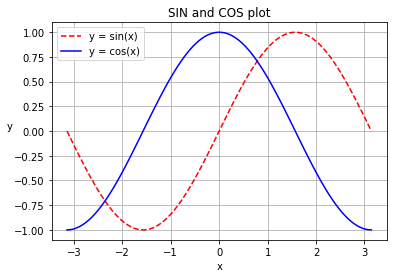

In [201]:
x = np.linspace(-np.pi, np.pi, 100)
s,c = np.sin(x), np.cos(x)
plt.title('SIN and COS plot')
plt.plot(x,s, color = 'red', linestyle = 'dashed', label='y = sin(x)');
plt.plot(x,c, color = 'blue', label = 'y = cos(x)');
plt.xlabel('x')
plt.ylabel('y', rotation = 0)
plt.legend();
plt.grid()
# тут правда нечего комментировать. Графики синуса и косинуса. Замечаем, что один из другого получается сдвигом на Pi/2

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

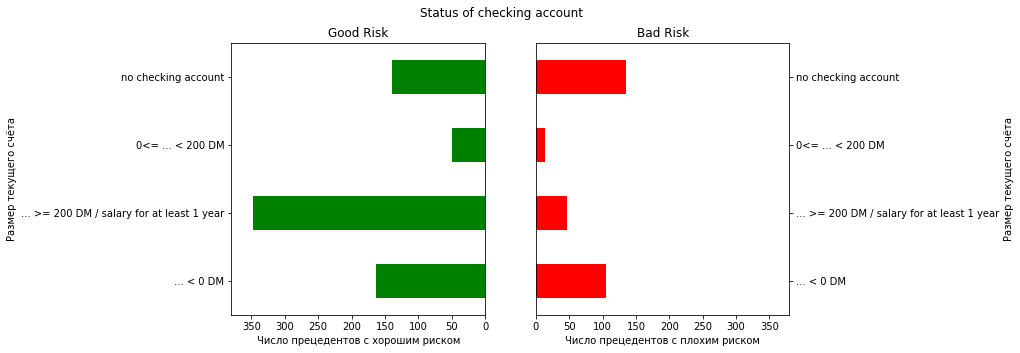

In [211]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 2, 1, title = 'Good Risk', xlim = (0,380))
plt.gca().invert_xaxis()
plt.xlabel('Число прецедентов с хорошим риском')
plt.ylabel('Размер текущего счёта')
data[data.credit_risk=='good'].status.value_counts().sort_index().plot.barh(color = 'green')
ax2 = plt.subplot(1, 2, 2, title = 'Bad Risk', xlim = (0,380))
plt.xlabel('Число прецедентов с плохим риском')
plt.ylabel('Размер текущего счёта')
data[data.credit_risk=='bad'].status.value_counts().sort_index().plot.barh(color = 'red')
plt.suptitle('Status of checking account');
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
# комментарий с выводами - во всех категориях размера счёта, кроме его отсутствия, людей с хорошим риском больше, чем людей с плохим. 
#так что безопаснее выдавать кредиты людям, у которых есть счёт

### Задание 8  (0.5 балла)

In [212]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

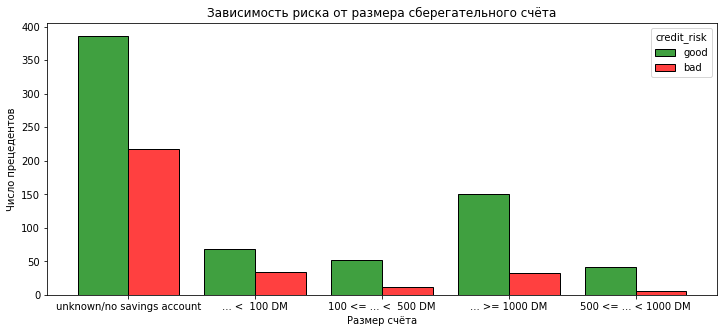

In [213]:
plt.figure(figsize=(12, 5))
plt.title('Зависимость риска от размера сберегательного счёта')
plt.ylabel('Число прецедентов')
plt.xlabel('Размер счёта')
sns.histplot(data, x='savings', hue='credit_risk', multiple='dodge',shrink=0.8, palette = ['g','r']);
#комментарии смотри под вторым графиком

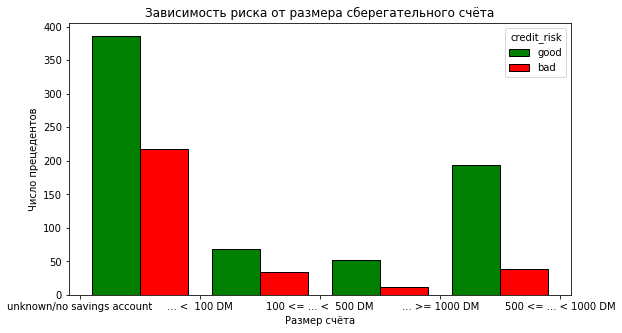

In [214]:
plt.figure(figsize=(9,5))
plt.title('Зависимость риска от размера сберегательного счёта')
plt.hist([data.savings[data.credit_risk=='good'], data.savings[data.credit_risk=='bad']], stacked=False, bins = 4, color = ['green', 'red'], label=['good','bad'], edgecolor = 'black');
plt.xlabel('Размер счёта')
plt.ylabel('Число прецедентов')
plt.legend(title = 'credit_risk');
#комментарий с выводами 
#данные не сбалансированны - с помощью data.savings.value_counts() можно увидеть, что около 600 людей принадлежали к первой категории по savings, оставшихся сильно меньше
#поэтому вывода вроде "лучше всего риск у людей без сбережений" сделать нельзя. Можно только рассматривать каждую категорию отдельно.
#Например, обратить внимание на то, что контраст прецедентов по риску больше всего выражен в третьей и четвёртой категориях людей - различие почти в 4 раза
#также во всех категориях людей с хорошим риском явно больше людей с плохим. Но, повторюсь, больше всего это различие в последних категориях
#можно неявно заключить, что безопаснее всего выдавать кредиты людям из двух последних категорий

#комментарий про seaborn и matplotlib. С точки зрения трудоёмкости, наверное, чуть больше понравилось строить график через seaborn
#с точки зрения восприятия - они выглядят для меня одинаково. 


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

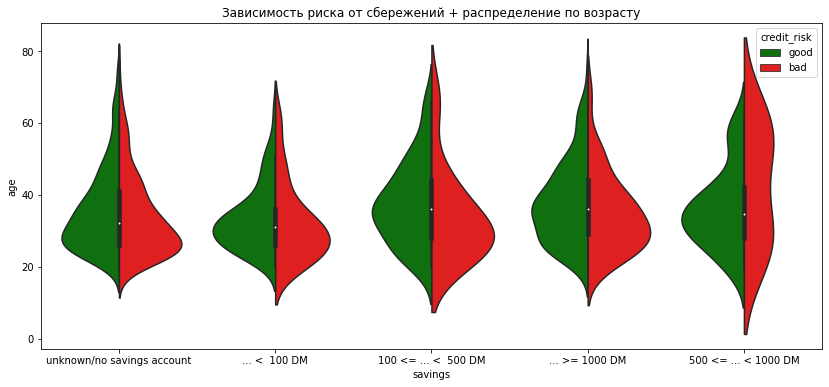

In [215]:
plt.figure(figsize=(14,6))
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk',split=True, palette=['g','r']);
plt.title('Зависимость риска от сбережений + распределение по возрасту');
#комментарий с выводами
#зафиксируем категорию людей (по сбережениям, желательно не последнюю). Из того, что "пузо" справа ниже "пуза" слева, можно заключить, 
#что доминирующий возраст людей с хорошим риском больше доминирующего возраста людей с плохим риском.
#опять же, во всех категориях, кроме последней, в основном люди возраста 20-40 лет. Только в последней люди с плохим риском 
#довольно равномерно распределены по возрасту. В частности, там находятся самые молодые люди из датасета.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

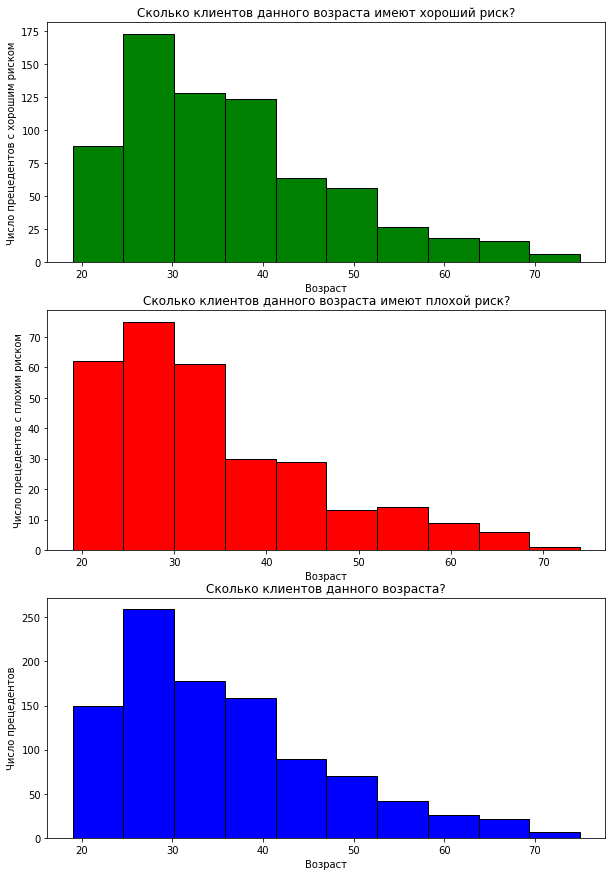

In [220]:
plt.figure(figsize = (10,15))
plt.grid(visible = False)
plt.subplot(3,1,1)
plt.title('Сколько клиентов данного возраста имеют хороший риск?')
plt.xlabel('Возраст');
plt.ylabel('Число прецедентов с хорошим риском');
plt.hist(data[data['credit_risk']=='good'].age, color='green', edgecolor = 'black' );
plt.subplot(3,1,2)
plt.title('Сколько клиентов данного возраста имеют плохой риск?')
plt.xlabel('Возраст');
plt.ylabel('Число прецедентов с плохим риском');
plt.hist(data[data['credit_risk']=='bad'].age, color='red', edgecolor='black');
plt.subplot(3,1,3)
plt.title('Сколько клиентов данного возраста?')
plt.xlabel('Возраст');
plt.ylabel('Число прецедентов');
plt.hist(data.age, color='blue', edgecolor='black');
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

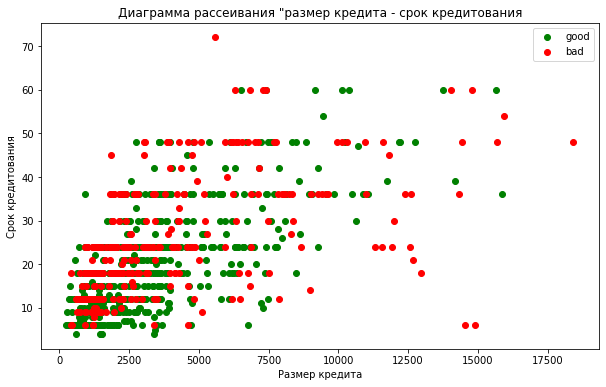

In [222]:
plt.figure(figsize=(10,6))
plt.scatter(data[data.credit_risk=='good'].amount, data[data.credit_risk=='good'].duration, c='green',label='good');
plt.scatter(data[data.credit_risk=='bad'].amount, data[data.credit_risk=='bad'].duration, c= 'red', label='bad');
plt.xlabel('Размер кредита');
plt.ylabel('Срок кредитования');
plt.title('Диаграмма рассеивания "размер кредита - срок кредитования');
plt.legend();

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

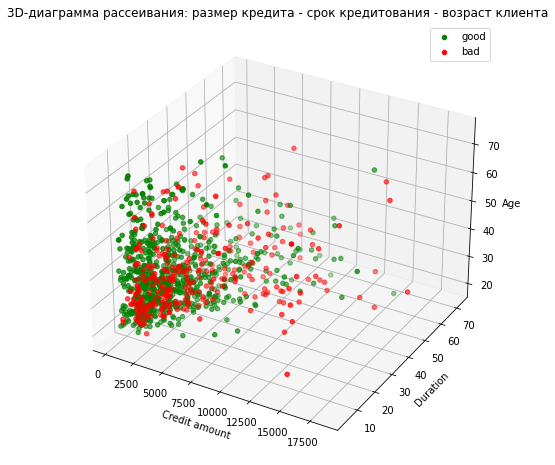

In [224]:
fig = plt.figure(figsize=(12,8))
a = fig.add_subplot(projection='3d')
a.set_xlabel('Credit amount')
a.set_ylabel('Duration')
a.set_zlabel('Age')
data1 = data[data.credit_risk == 'good']
data2 = data[data.credit_risk == 'bad']
a.scatter(data1['amount'], data1['duration'], data1['age'], c= 'green', label='good');
a.scatter(data2['amount'], data2['duration'], data2['age'], c= 'red', label = 'bad');
plt.legend();
plt.title('3D-диаграмма рассеивания: размер кредита - срок кредитования - возраст клиента');

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [26]:
set(data.number_credits.values)

{'1', '2-3', '4-5', '>= 6'}

In [27]:
#property        кажется, можно ввести порядок по ценности => будет порядковым
#installment_rate     не количественный (не числа), не бинарный (больше двух вариантов), имеет естественный порядок => пусть будет порядковый
#people_liable     принимает всего два значения => пусть будет бинарным
#present_residence   не количественный (не числа), не бинарный (больше двух вариантов), имеет естественный порядок => пусть будет порядковый
#foreign_worker      принимает всего два значения => пусть будет бинарным
#telephone         принимает всего два значения => пусть будет бинарным
#savings       не количественный (не числа), не бинарный (больше двух вариантов), имхо имеет порядок (где неизвестность хуже всего) => пусть будет порядковый
#employment_duration     не количественный (не числа), не бинарный (больше двух вариантов), имхо имеет порядок (где отсутствие работы хуже всего) => пусть будет порядковый
#number_credits      категориальный, но естественно вводится порядок => порядковый
#credit_risk         два значения => бинарный

data.drop(['job','housing','status','credit_history','purpose','other_installment_plans','other_debtors','personal_status_sex'], axis = 1, inplace = True)

data.property = data.property.map({'building soc. savings agr./life insurance':2,'car or other':1,'real estate':3,'unknown / no property':0})
data.installment_rate = data.installment_rate.map({'20 <= ... < 25':2, '25 <= ... < 35':1, '< 20':3, '>= 35':0})
data.people_liable = data.people_liable.map({'0 to 2':0, '3 or more':1})
data.present_residence = data.present_residence.map({'1 <= ... < 4 yrs':1, '4 <= ... < 7 yrs':2, '< 1 yr':0, '>= 7 yrs':3})
data.foreign_worker = data.foreign_worker.map({'no':1, 'yes':0})
data.telephone = data.telephone.map({'no':0, 'yes (under customer name)':1})
data.savings = data.savings.map({'... <  100 DM':1,'... >= 1000 DM':4,'100 <= ... <  500 DM':2, '500 <= ... < 1000 DM':3, 'unknown/no savings account':0})
data.employment_duration = data.employment_duration.map({'1 <= ... < 4 yrs':2, '4 <= ... < 7 yrs':3, '< 1 yr':1, '>= 7 yrs':4, 'unemployed':0})
data.number_credits = data.number_credits.map({'1':0, '2-3':1, '4-5':2, '>= 6':3})
data.credit_risk = data.credit_risk.map({'bad':0, 'good':1})
#data.head(15)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.24800,1.105000,2.384000,1.973000,1.845000,1.358000,35.54200,0.407000,0.155000,0.404000,0.963000,0.700000
std,12.058814,2822.75176,1.580023,1.208306,1.118715,1.103718,1.050209,11.35267,0.577654,0.362086,0.490943,0.188856,0.458487
min,4.000000,250.00000,0.000000,0.000000,0.000000,0.000000,0.000000,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.50000,0.000000,2.000000,1.000000,1.000000,0.000000,27.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.50000,0.000000,2.000000,2.000000,2.000000,1.000000,33.00000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,24.000000,3972.25000,2.000000,4.000000,3.000000,3.000000,2.000000,42.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,72.000000,18424.00000,4.000000,4.000000,3.000000,3.000000,3.000000,75.00000,3.000000,1.000000,1.000000,1.000000,1.000000


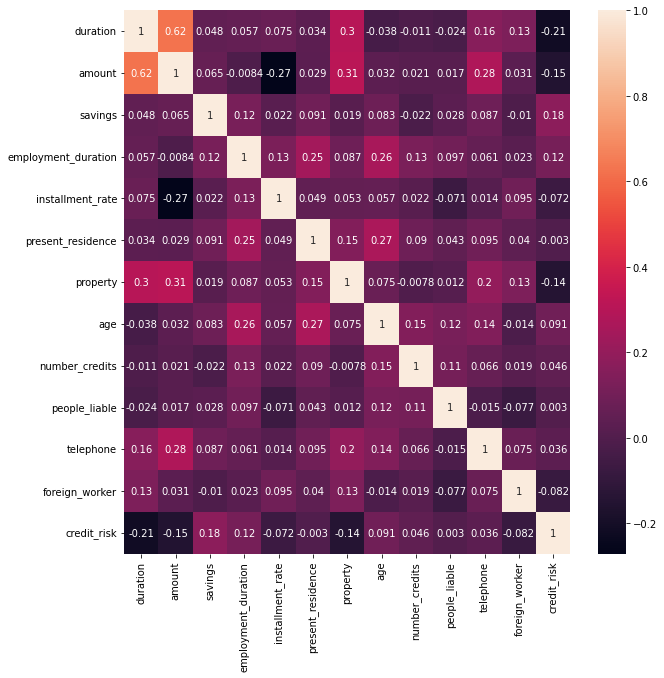

In [29]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True);
data.describe()

In [30]:
#из heatmap делаю вывод, что основную связь с целевой переменной имеют duration, amount, savings, employment_duration, property. С соответствующими знаками
# да, маленький коэффициент означает лишь отсутствие линейной зависимости. Но я попробую обойтись вышеуказанными признаками
# отнормирую признаки, чтобы они принимали значения от 0 до 1
data = data[['duration','amount','savings','employment_duration','property','credit_risk']]

data.duration = data.duration.apply(lambda x: (x-4)/68)
data.amount = data.amount.apply(lambda x: (x-250)/18174)
data.savings = data.savings /4
data.employment_duration = data.employment_duration/4
data.property = data.property /3
data.describe()



/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,duration,amount,savings,employment_duration,property,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.248574,0.166240,0.276250,0.596000,0.452667,0.700000
std,0.177336,0.155318,0.395006,0.302077,0.350070,0.458487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.061379,0.000000,0.500000,0.000000,0.000000
50%,0.205882,0.113871,0.000000,0.500000,0.333333,1.000000
75%,0.294118,0.204812,0.500000,1.000000,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение

<ipython-input-31-f6386476e2e7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


In [32]:
def predict(Xtest: np.array) -> np.array:
   return np.array([1]*len(Xtest))

accuracy_score(y_test, predict(X_test))
#просто говорим, что все заёмщики хорошие и получаем точность 0,66. Хех
#конечно, это плохая модель. Ниже приведены две более разумных

0.66

In [33]:
w = np.array([-1, -0.8, 1.2, 1, -0.3]) #вектор весов
def predict(X: np.array) -> np.array:
   return X @ w >-0.5

accuracy_score(y_test, predict(X_test))
#как бы линейная модель

0.7

In [34]:
w = np.array([0.5, 1.3, 0.4, 0.3, 0.2])     # подбирал вручную, этот вектор позволяет по-разному смотреть на разницу в признаках

def almost_predict(obj):    #вспомогательная функция, возвращает предсказание для конкретного объекта
  return y_train[np.argmin(np.absolute(X_train-obj) @ w)]  

def predict(X_test: np.array) -> np.array:
   return np.apply_along_axis(almost_predict, axis = 1, arr = X_test)

accuracy_score(y_test, predict(X_test))
#это чем-то похоже на метод К ближайших соседей для одного соседа. Я беру объект из тестировочной выборки, ищу наиболее похожий (минимизурую сумму модулей
#отклонения по всем признакам) из обучающей выборки и выдаю то же значение целевой переменной, что и на этом объекте
#P.S. Да, кажется, это и есть метрика. Манхэттэнская. От добавления весов метрикой она быть не перестаёт.

0.672